In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle

import strucfunc
from strucfunc import sosflog
import bfunc 

In [3]:
name = 'N604O'

In [4]:
pickle_in = open('VFM//' + name + '.pkl',"rb")
data = pickle.load(pickle_in)
sb = data['sb']
vv = data['vv']
ss = data['ss']

In [5]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

<ipython-input-5-95afb24455fa>:2: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)


In [6]:
sb.shape

(151, 145)

In [7]:
box_size = np.sqrt(151 * 145) * data['pix'] * data['pc']

In [8]:
rslt = strucfunc.strucfunc_numba_parallel(data['vv'], wmap=data['sb'], dlogr=0.05)

C:\Users\ZAINTEL2\Dropbox\Articulos\PhD\PhD-master02\strucfunc.py:83: RuntimeWarning: invalid value encountered in true_divide
  'Unweighted B(r)': sf/nsf,
C:\Users\ZAINTEL2\Dropbox\Articulos\PhD\PhD-master02\strucfunc.py:84: RuntimeWarning: invalid value encountered in true_divide
  'Weighted B(r)': wsf/weight}


In [9]:
good = (~m) & (sb > 0.001)
rslt["Unweighted mean velocity"] = np.mean(vv[good])
rslt["Unweighted sigma^2"] = np.var(vv[good])
v0w = rslt["Weighted mean velocity"] = np.average(vv, weights=sb)
rslt["Weighted sigma^2"] = np.average((vv - v0w)**2, weights=sb)

In [10]:
b2 = rslt['Unweighted B(r)']
e_b2 = b2  *.1
s = 10**rslt['log10 r'] * data['pix'] * data['pc']
e_s = s  *.1
sig2 = rslt['Unweighted sigma^2']
sig = sig2**0.5

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\lib\function_base.py:1405: RuntimeWarning: invalid value encountered in remainder
  xp = xp % period


9.45585353180505

x = s
y = b2 - sig2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
r0 = SFr[0]

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

2.8311607575538895

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

80.54773759281632

(35.29953015831453, 9.45585353180505, 1.2, 1.5563445559185105, 0.01)

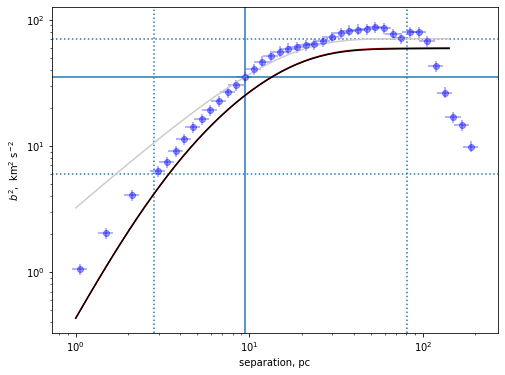

In [14]:
m = 1.2
s0 = data['s0']
noise = 0.01

fig, ax = plt.subplots(figsize=(8, 6))
rgrid = np.logspace(0, 2.15)
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m, s0, noise

In [15]:
rslt

{'log10 r': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25]),
 'Sum dv^2': array([7.83203670e+03, 0.00000000e+00, 0.00000000e+00, 3.01485206e+04,
        0.00000000e+00, 0.00000000e+00, 1.46925385e+05, 0.00000000e+00,
        0.00000000e+00, 1.35565703e+05, 2.10352667e+05, 2.56085855e+05,
        5.46529429e+05, 8.57534557e+05, 8.70499272e+05, 1.38539011e+06,
        2.78510692e+06, 2.67786287e+06, 4.29047630e+06, 6.53439818e+06,
        1.08409083e+07, 1.22318590e+07, 1.66513092e+07, 2.46336234e+07,
        2.80331808e+07, 3.62261324e+07, 4.58717940e+07, 5.43403043e+07,
        6.54593976e+07, 8.04934445e+07, 1.03943906e+08, 1.17733427e+08,
        1.45446603e+08, 1.63228434e+08, 1.88883540e+08, 1.99819432e+08,
        1.9

In [16]:
N604 = { 'VF' : data,
        'SF' : rslt,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : data['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : data['s0'],
        'm' : m,
        'pix' : data['pix'],
        'box_size': box_size} 

In [17]:
f = open('Results\\SF'+ name + '.pkl',"wb")
pickle.dump(N604,f)
f.close()

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 10.705111503601074 seconds ---
